## <span style = "color:blue"> Data Mining Group Homework 1 </span>
### <span style="color:purple"> Syed Hassan Raza, Brittany Thum, Xinpei Zhao and Yuying Chen </span>

In [1]:
#importing useful libraries. more libraries will be added later in relative chunks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
#issues with decision tree arrows is solved by this code
#sns.reset_defaults()

In [3]:
data = pd.read_csv("/Users/hanyhamdani/Desktop/Coursework/Mod B Fall/DataMining/adult.csv", header = None)
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape[0]

32561

In [5]:
col_names = ["Age", "WorkClass", "Final_Weight", "Education",
             "Edu_Num", "Martial_Status", "Occupation", "Relationship",
             "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week",
             "Native_Country", "Income"]

data.columns = col_names

data.head()

,Age,WorkClass,Final_Weight,Education,Edu_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
(data['Education'].value_counts(),data['Edu_Num'].value_counts()) 
#Edu_Num and Education are same columns.
#so we need to keep only one of them


( HS-grad         10501
  Some-college     7291
  Bachelors        5355
  Masters          1723
  Assoc-voc        1382
  11th             1175
  Assoc-acdm       1067
  10th              933
  7th-8th           646
  Prof-school       576
  9th               514
  12th              433
  Doctorate         413
  5th-6th           333
  1st-4th           168
  Preschool          51
 Name: Education, dtype: int64, 9     10501
 10     7291
 13     5355
 14     1723
 11     1382
 7      1175
 12     1067
 6       933
 4       646
 15      576
 5       514
 8       433
 16      413
 3       333
 2       168
 1        51
 Name: Edu_Num, dtype: int64)

In [7]:
fw_sum = data['Final_Weight'].sum()

In [8]:
#adding the whole dataset by replicating each row with its corresponding Final_Weight
#data = data.reindex(data.index.repeat(data['Final_Weight']))

# Predict if household incomes greater than $50K

# Exploratory Data Analysis

#### Q1: How many observations (rows) and how many variables (columns) are there in the raw data?

In [9]:
print("Actual Number of Rows is: ", fw_sum, ",however we have rescaled it and got: ", int(fw_sum/10000))
print("The data file given without final weight replication, has", data.shape[0],"rows")
print("Number of Columns is: ", data.shape[1])
#print("These columns are: ",data.columns.values)

Actual Number of Rows is:  6179373392 ,however we have rescaled it and got:  617937
The data file given without final weight replication, has 32561 rows
Number of Columns is:  15


#### Q2:Produce a table of variables showing their types?

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
WorkClass         32561 non-null object
Final_Weight      32561 non-null int64
Education         32561 non-null object
Edu_Num           32561 non-null int64
Martial_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_per_Week    32561 non-null int64
Native_Country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Q3: Some of the variables appear to be numeric but should be treated as categorical. Your best clue is whether a variable has only a few discrete values. Which numeric variables should be treated as categorical?

In [11]:
#"Education" ,"Martial_Status", "Occupation", "Relationship", "Race", "Sex", "Native_Country" are obvious
#lets check other doubtful ones:  Edu_Number, Final_Weight, Capital_Gain, Capital_Loss, Hours_per_Week, Income

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
WorkClass         32561 non-null object
Final_Weight      32561 non-null int64
Education         32561 non-null object
Edu_Num           32561 non-null int64
Martial_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_per_Week    32561 non-null int64
Native_Country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### <span style= "color:green"> Ans: Other column to include in category is: Edu_Num  </span>

All Categorical Columns are:
<span style='color:blue'>   
"Education" ,"Martial_Status", "Occupation", 
"Relationship","Race", "Sex", "Native_Country",
"Edu_Num", "Hours_per_Week","Income"
</span>

In [12]:
#checking if we have an unusual thing in data values
for cols in ['WorkClass','Education', 'Edu_Num','Martial_Status','Occupation',
             'Relationship','Race','Sex','Native_Country','Income']:
    print(cols ," : ",data[cols].value_counts())

WorkClass  :   Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64
Education  :   HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Edu_Num  :  9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Edu_Num, dtype: int64
Martial_Status  :   Married-civ-spouse       14976
 Never-married    

In [13]:
# WorkClass : 1836 values for '?'   it could be private work
# Occupation : 1843 values for '?'  can give them 'Random Job' name as it doesnt matter
# Native Country : 583 values for '?'  could be USA


##  <span style = "color:blue"> Going to rescale Final_Weight by 10000 and replicate each row Final_Weight times </span>


In [14]:
data['Final_Weight'] = data['Final_Weight']/10000

In [15]:
#Replication of each row Final_Weight (rescaled 10k) times
data = data.reindex(data.index.repeat(data['Final_Weight']))
data.head()

,Age,WorkClass,Final_Weight,Education,Edu_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,7.7516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [16]:
data.shape[0]

601554

In [17]:
#removing final_weight, no more use of it
data.drop('Final_Weight', axis = 1, inplace = True)
data.head(2)

,Age,WorkClass,Education,Edu_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


#### Q4: For numeric variables, produce a table of statistics including missing values,
####    min, max, median, mean, standard deviation, skewness and kurtosis.


In [18]:
#first make a list of numeric variables

num_vars = ['Age', 'Capital_Gain','Capital_Loss','Hours_per_Week']

#stats to perform
stats = ['min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']

data[num_vars].agg(stats)

,Age,Capital_Gain,Capital_Loss,Hours_per_Week
min,17.000000,0.000000,0.000000,1.000000
max,90.000000,99999.000000,4356.000000,99.000000
mean,37.984527,1079.541183,84.945583,40.305065
median,36.000000,0.000000,0.000000,40.000000
std,13.464064,7436.344622,396.624057,12.087739
skew,0.595833,11.909010,4.644934,0.203340
kurtosis,-0.119916,153.196906,20.801014,2.985449


<span  style ="color:blue">Capital_Gain & Capital_Loss</span> have kurtosis values > 3, which is a worring point
Need to check Outlier

#### Q5: How many outliers are present in each numeric variable? Show the tallies in a table. Set them to missing.

<span style="color:green">Since we already checked through kurtosis that  Capital_Gain and Capital_Loss have values to that could be outlier.
Lets check through our standard Interquartile range check and find if there are more variables that may have outliers
and set them to missing.</span>


In [19]:
#check if data already has any missing value
data.isna().sum()

Age               0
WorkClass         0
Education         0
Edu_Num           0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_Week    0
Native_Country    0
Income            0
dtype: int64

In [20]:
#number of outlier in each col:
outlier_data = data.copy()

In [21]:
#finding outlier
for col in num_vars :
    outlier_data[col] = np.where(np.abs(outlier_data[col] - outlier_data[col].mean()) > (3 * outlier_data[col].std()), np.nan, outlier_data[col])
#how many na's will tell us number of outliers
outlier_data.isna().sum()

Age                2228
WorkClass             0
Education             0
Edu_Num               0
Martial_Status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_Gain       3948
Capital_Loss      26524
Hours_per_Week     8645
Native_Country        0
Income                0
dtype: int64

<span style="color:green">
Outliers are in : Age, Final_Weight, Capital_Gain, Capital_Loss, Hours_per_Week <br>
1. Age & Final_Weight : We dont have to remove outliers <br>
2. Capital_Gain and Capital_Loss: We Will convert them into one variable and check its outliers and do interpolation <br>
3. Hours_per_Week: we will do in the end
</span>

capital gain has unusually huge number.

Lets check whats the total number of variable in it. and whats mean and std values.

Best would be to impute these with nearest values using interpolation because if we replace with any other values

such as mean or other values or even if delete,

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


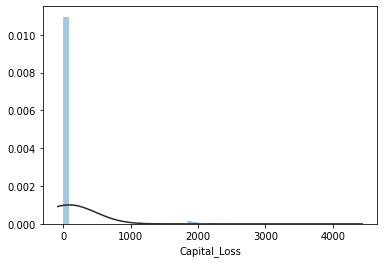

In [22]:
from scipy.stats import norm
sns.distplot(data['Capital_Loss'], kde = False, fit = norm)  #, fit = norm, kde=False)

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


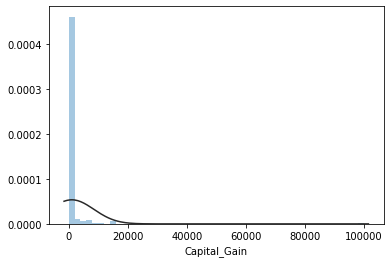

In [23]:
from scipy.stats import norm
sns.distplot(data['Capital_Gain'], kde = False, fit = norm) 

Instead of taking Capital_Loss and Capital_Gain seperately, we can find:<br>
$ NetCapital = CapitalGain - CapitalLoss $

In [24]:
data['NetCapital'] = data['Capital_Gain'] - data['Capital_Loss']
data.head(2)

,Age,WorkClass,Education,Edu_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income,NetCapital
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174


In [25]:
#check outliers now in capital_net
num_vars.append('NetCapital')

data[num_vars].agg(stats)

,Age,Capital_Gain,Capital_Loss,Hours_per_Week,NetCapital
min,17.000000,0.000000,0.000000,1.000000,-4356.000000
max,90.000000,99999.000000,4356.000000,99.000000,99999.000000
mean,37.984527,1079.541183,84.945583,40.305065,994.595601
median,36.000000,0.000000,0.000000,40.000000,0.000000
std,13.464064,7436.344622,396.624057,12.087739,7459.218243
skew,0.595833,11.909010,4.644934,0.203340,11.831159
kurtosis,-0.119916,153.196906,20.801014,2.985449,151.829148


/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


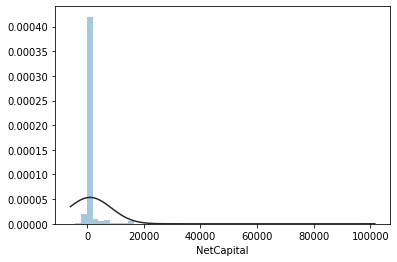

In [26]:
#check NetCapital's distribution
sns.distplot(data['NetCapital'], kde = False, fit = norm)   #majority lie in 

In [27]:
#Hours_per_Week
data.Hours_per_Week.describe()

count    601554.000000
mean         40.305065
std          12.087739
min           1.000000
25%          40.000000
50%          40.000000
75%          45.000000
max          99.000000
Name: Hours_per_Week, dtype: float64

In [28]:
#age column outlier check
data['Age'].describe()
#no need to treat this thing

count    601554.000000
mean         37.984527
std          13.464064
min          17.000000
25%          27.000000
50%          36.000000
75%          47.000000
max          90.000000
Name: Age, dtype: float64

In [29]:
#Capital_Gain & Capital_Loss
same_Values = data[data['Capital_Loss'] == data['Capital_Gain']] 
same_Values[same_Values['Capital_Loss'] > 0]  #same results for Capital_Gain

,Age,WorkClass,Education,Edu_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income,NetCapital


The two columns: Capital_Gain and Capital_Loss have:
        1. both 0 values
        2. One column has non zero value but other is zero for same record
        
We will turn this into 1 and 0 instead of imputing any other value and then no more outliers
which means;
<br>
$NetCapital = 0$ , there is Capital_Loss
    <br>
$NetCapital = 1$ , there is Capital_Gain


In [30]:
data['NetCapital'] = data['NetCapital'].astype('bool') * 1
data['NetCapital'].value_counts()

0    524520
1     77034
Name: NetCapital, dtype: int64

In [31]:
#removing Capital_Gain and Capital_Loss Column
data.drop(['Capital_Gain', 'Capital_Loss'], axis = 1, inplace = True)
data.head(2)

,Age,WorkClass,Education,Edu_Num,Martial_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Native_Country,Income,NetCapital
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1


In [32]:
#Additionally, we already have Education and we dont need redundancy in Edu_Num form 
#removing it also

data.drop('Edu_Num', axis = 1 , inplace = True)

#### So the only column we need to work on is Hours_per_Week

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


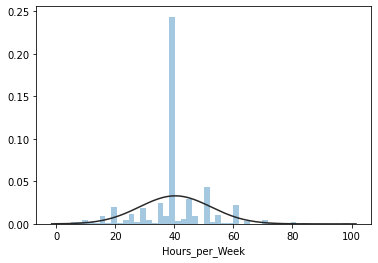

In [33]:
#checking distribution that will be needed for imputation of missing values
sns.distplot(data.Hours_per_Week, kde = False, fit = norm)

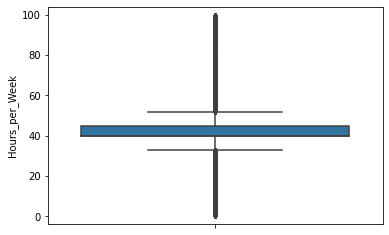

In [34]:
sns.boxplot(y = data.Hours_per_Week)  # 

In [35]:
data.Hours_per_Week.mean()

40.30506488195574

#### Setting outliers in this column to missing values

In [36]:
data['Hours_per_Week'] = np.where(np.abs(data.Hours_per_Week - data['Hours_per_Week'].mean()) > (3 * data['Hours_per_Week'].std()), np.nan, data['Hours_per_Week'])

print("Number of Outliers in Hours_per_Week :", data.Hours_per_Week.isna().sum())
      

Number of Outliers in Hours_per_Week : 8645


#### Q6: Count the unique values of each categorical variable, including missing values. Are there any unusual values in any of the categorical variables?

In [37]:
#Although we have converted Capital_Gain and Capital Loss into Categorical Var: Net_Capital 
#whose unique values are only 1 and 0, we will not be using it here
cat_vars = ['WorkClass', 'Education', 'Martial_Status', 'Occupation',
            'Relationship', 'Race', 'Sex', 'Native_Country','Income']

for cat in cat_vars:
    print('\033[1m' +"Unique Values in:",cat +'\033[0m',"\n")
    print(data[cat].value_counts())
    print("\n\n")
    print("***********************************")   #just pretty formatting
    print("\n")

Unique Values in: WorkClass 

 Private             426048
 Self-emp-not-inc     43355
 Local-gov            38426
 ?                    33695
 State-gov            23256
 Self-emp-inc         19085
 Federal-gov          17297
 Without-pay            238
 Never-worked           154
Name: WorkClass, dtype: int64



***********************************


Unique Values in: Education 

 HS-grad         193717
 Some-college    133929
 Bachelors        98016
 Masters          30134
 Assoc-voc        24441
 11th             22313
 Assoc-acdm       20112
 10th             17915
 7th-8th          11831
 Prof-school      10403
 9th              10146
 12th              8404
 5th-6th           7573
 Doctorate         7503
 1st-4th           3939
 Preschool         1178
Name: Education, dtype: int64



***********************************


Unique Values in: Martial_Status 

 Married-civ-spouse       272124
 Never-married            203392
 Divorced                  80312
 Separated                 2

Ans: <span style="color:green"> WorkClass, Occupation, Native Country  columns have each one subcategory that has "?" as its value.</span> <br>
<span style="color:green"> Since its a categorical value and we will one hot ecnode them later, this "?" doesnt matter much. We will use "Unkown_" prefix here for them</span>

#### Q7: Impute the missing values. Be sure to explain how you did that in your presentation.

Easiest way is to replace it with mean, but it can skew data as there is high number of outliers in data. 
for this reason checking up distribution of data in all these columns and see what best thing could be done

We will put the largest values within allowable range and every outlier will be replaced by that value

In [38]:
#Hours_per_Week
print(round((88716/data.shape[0] * 100),2), "%  of total data, so we cant drop them")

14.75 %  of total data, so we cant drop them


In [39]:
data.Hours_per_Week = data.Hours_per_Week.interpolate(method='nearest', limit_direction = 'both')
data.isna().sum()

Age               0
WorkClass         0
Education         0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_Week    0
Native_Country    0
Income            0
NetCapital        0
dtype: int64

<span style = "color:green">We used interpolation 'nearest' to fill in the values. 
If we had replaced null values with mean, it would have replaced our high values with mean and thus changed the income results. Majority of population that works around mean number of hours (40), has income less than or equal to 50. Those who work more than 60 hours/week, have majority that has income > 50k. Replacing with mean value may result in us classifying high earners as less than 50k earners.
We want our data to be considerate of extreme/border values so that we have the true representative of data. 
Nearest method will replace it with nearest neighbour.</span>

#### Q8: Produce a histogram or boxplot for each of the numeric variables.



In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601554 entries, 0 to 32560
Data columns (total 12 columns):
Age               601554 non-null int64
WorkClass         601554 non-null object
Education         601554 non-null object
Martial_Status    601554 non-null object
Occupation        601554 non-null object
Relationship      601554 non-null object
Race              601554 non-null object
Sex               601554 non-null object
Hours_per_Week    601554 non-null float64
Native_Country    601554 non-null object
Income            601554 non-null object
NetCapital        601554 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 59.7+ MB


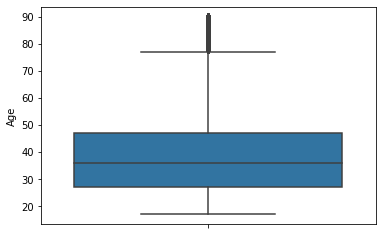

In [41]:
#'Age', 'Hours_per_Week', 'NetCapital'

sns.boxplot(y = data.Age)

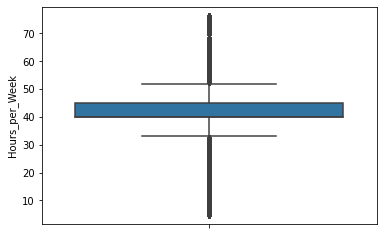

In [42]:
sns.boxplot(y = data.Hours_per_Week)

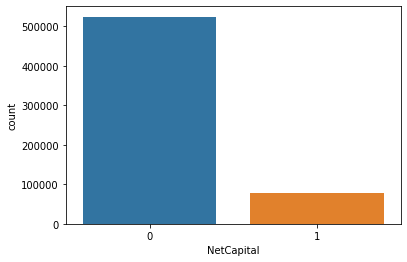

In [43]:
sns.countplot(x = data.NetCapital)

#### Q9: Produce a bar chart for each of the categorical variables showing the counts for each unique value.

#### Categorical Variables now: 
 <span style="color:green">'WorkClass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country', 'Income', 'NetCapital' </span>

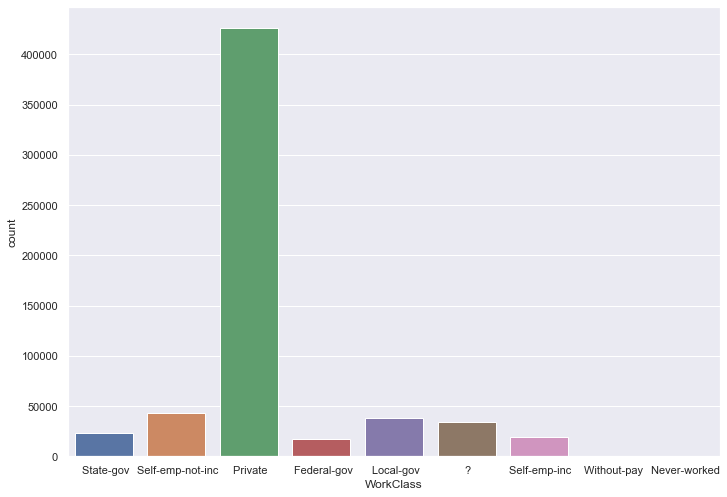

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#WorkClass
ax = sns.countplot(x="WorkClass", data=data)

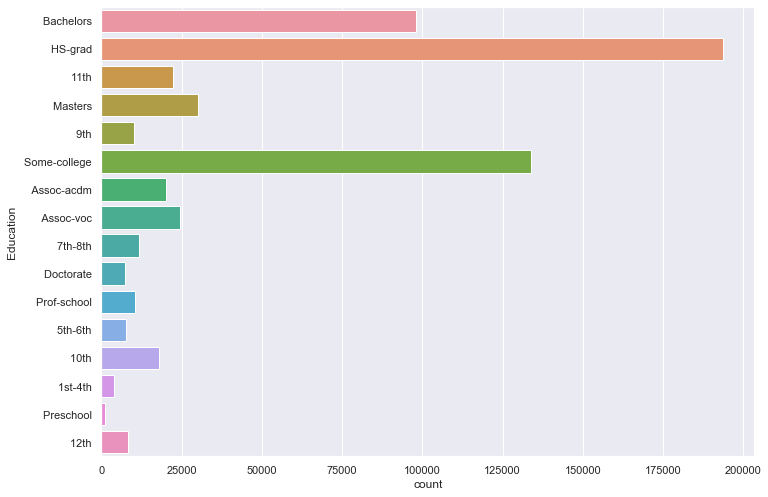

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(y="Education", data=data)

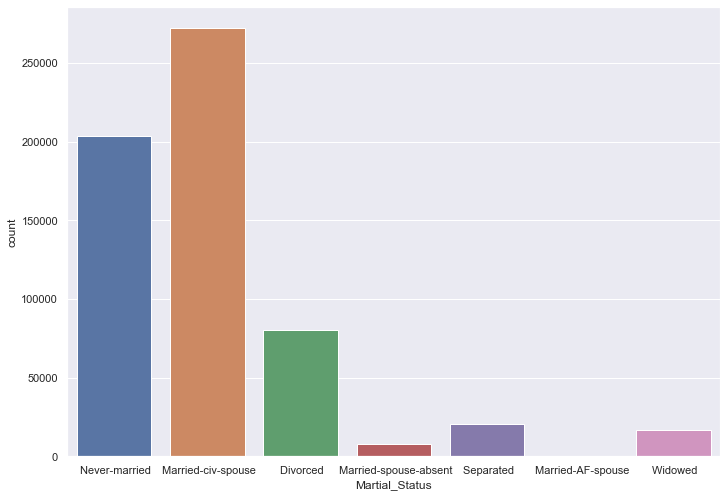

In [46]:
sns.countplot(x = 'Martial_Status', data = data)

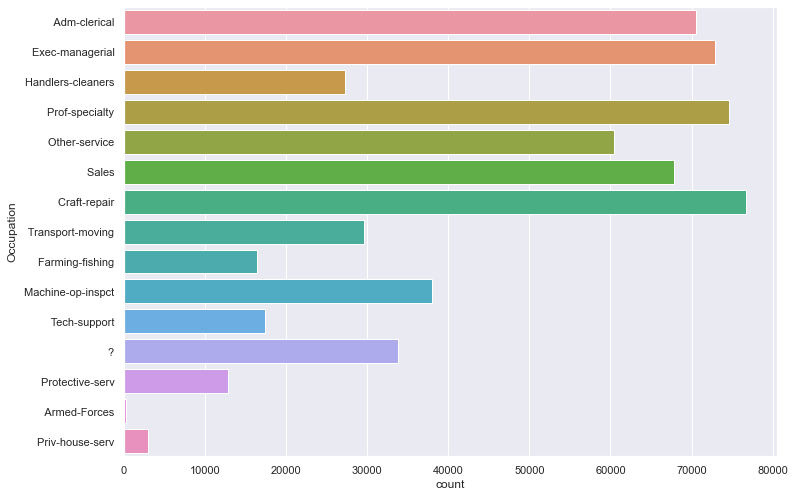

In [47]:

sns.countplot(y = 'Occupation', data = data)

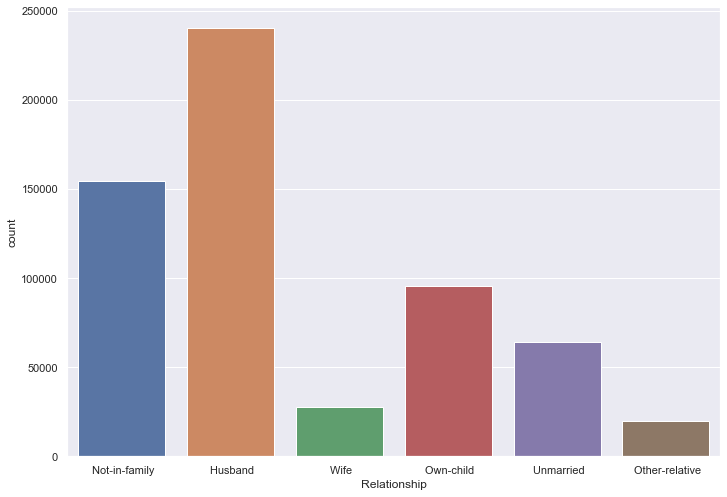

In [48]:
#  'Sex', 'Native_Country', 'Income', 'NetCapital']
sns.countplot(x = 'Relationship', data = data)

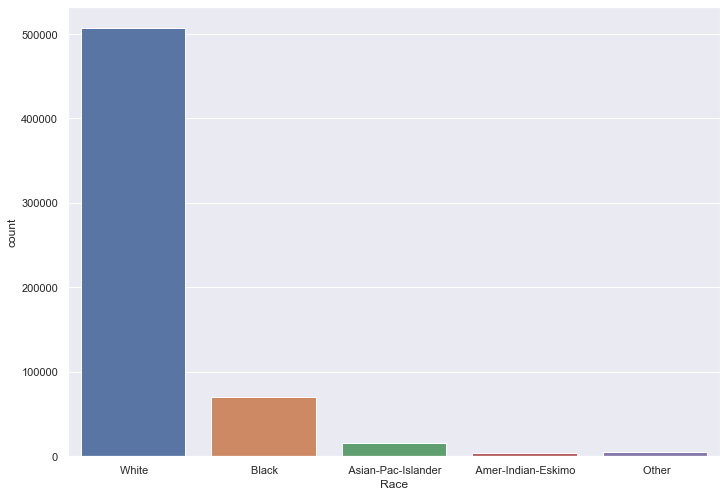

In [49]:
sns.countplot(x = 'Race', data = data)

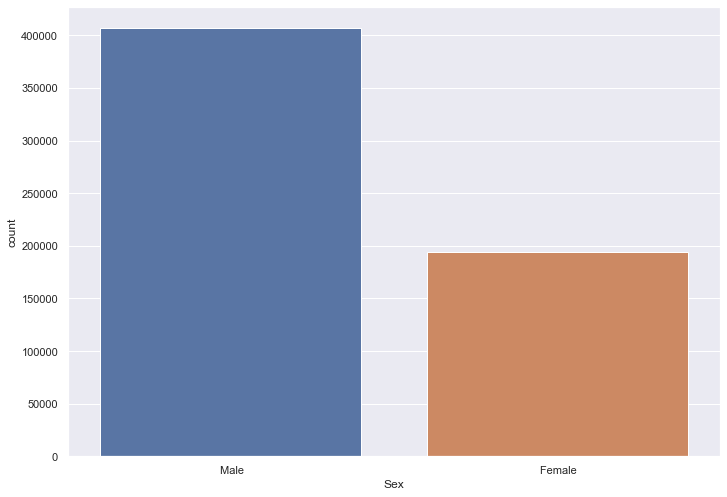

In [50]:
#  'Sex', 'Native_Country', 'Income', 'NetCapital']
sns.countplot(x = 'Sex', data = data)

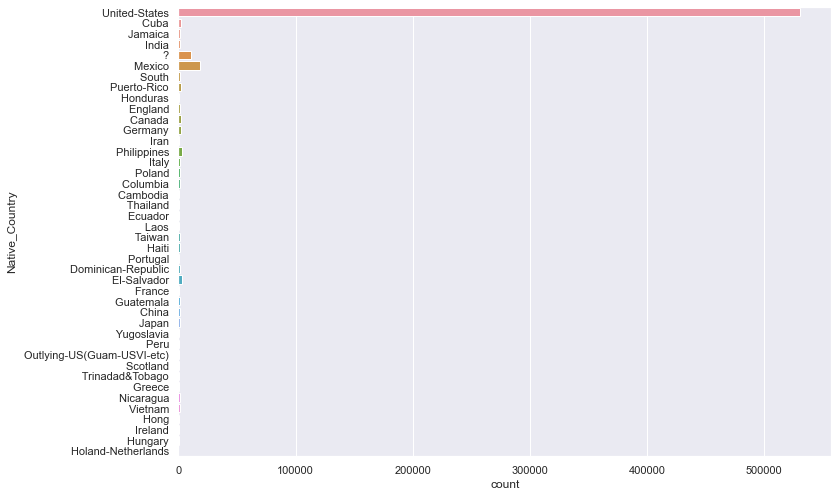

In [51]:
#  'Sex', 'Native_Country', 'Income', 'NetCapital']
sns.countplot(y = 'Native_Country', data = data)

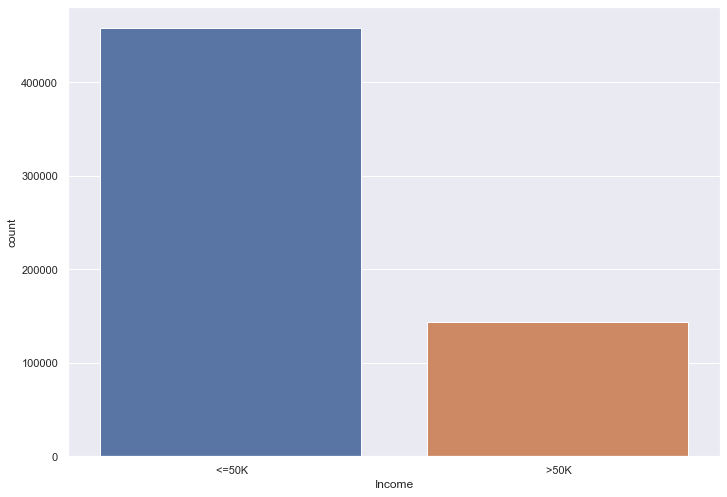

In [52]:
#  'Sex', 'Native_Country', 'Income', 'NetCapital']
sns.countplot(x = 'Income', data = data)

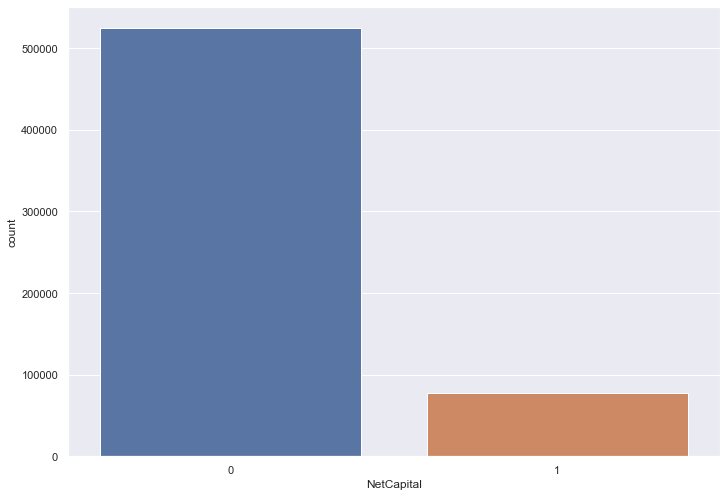

In [53]:
#  'Sex', 'Native_Country', 'Income', 'NetCapital']
sns.countplot(x = 'NetCapital', data = data)

# EDA for Data Modelling

One Hot Encoding all variables/predictors

#### We have '?' among int values of WorkClass, Occupation and Native_Country

In [54]:
replace_dict = {'WorkClass': {'?': pd.to_numeric(data.WorkClass, errors='coerce').mean()}, 
                'Occupation':{'?': pd.to_numeric(data.Occupation, errors='coerce').mean()}, 
                'Native_Country':{'?': pd.to_numeric(data.Native_Country, errors='coerce').mean()}}

data.replace(replace_dict, inplace=True)
data.head(3)

,Age,WorkClass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Native_Country,Income,NetCapital
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,1
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,1
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,1


In [55]:
data.WorkClass.value_counts()

 Private             426048
 Self-emp-not-inc     43355
 Local-gov            38426
 ?                    33695
 State-gov            23256
 Self-emp-inc         19085
 Federal-gov          17297
 Without-pay            238
 Never-worked           154
Name: WorkClass, dtype: int64

In [56]:
data.WorkClass = data.WorkClass.str.replace('?','Unknown_WorkClass')
data.WorkClass.value_counts()

 Private              426048
 Self-emp-not-inc      43355
 Local-gov             38426
 Unknown_WorkClass     33695
 State-gov             23256
 Self-emp-inc          19085
 Federal-gov           17297
 Without-pay             238
 Never-worked            154
Name: WorkClass, dtype: int64

In [57]:
data.Occupation = data.Occupation.str.replace('?','Unknown_Occupation')
data.Occupation.value_counts()

 Craft-repair          76689
 Prof-specialty        74633
 Exec-managerial       72954
 Adm-clerical          70507
 Sales                 67836
 Other-service         60498
 Machine-op-inspct     38035
 Unknown_Occupation    33849
 Transport-moving      29586
 Handlers-cleaners     27310
 Tech-support          17350
 Farming-fishing       16421
 Protective-serv       12776
 Priv-house-serv        2920
 Armed-Forces            190
Name: Occupation, dtype: int64

In [58]:
data.Native_Country = data.Native_Country.str.replace('?','Unknown')
data.Native_Country.value_counts()

 United-States                 531003
 Mexico                         18290
 Unknown                        10966
 Philippines                     3197
 El-Salvador                     2644
 Germany                         2528
 Cuba                            2293
 Puerto-Rico                     2246
 Canada                          2112
 Jamaica                         1678
 Guatemala                       1664
 India                           1636
 England                         1595
 China                           1311
 Dominican-Republic              1311
 Columbia                        1300
 Italy                           1292
 South                           1272
 Japan                           1121
 Poland                          1076
 Vietnam                         1061
 Nicaragua                        984
 Taiwan                           926
 Haiti                            897
 Peru                             836
 Iran                             763
 France     

#### Coverting Native_Country Column to United-States and Others (Five types ONLY)


In [59]:
data[data.Native_Country != ' United-States'].Native_Country  #.Native_Country



4           Cuba
4           Cuba
4           Cuba
4           Cuba
4           Cuba
          ...   
32553     Taiwan
32553     Taiwan
32553     Taiwan
32553     Taiwan
32553     Taiwan
Name: Native_Country, Length: 70551, dtype: object

In [60]:
need = data['Native_Country'].value_counts().index[:3]
data['Native_Country']= np.where(data['Native_Country'].isin(need), data['Native_Country'], 'Others')

valCount = data['Native_Country'].value_counts()
print(valCount)

 United-States    531003
Others             41295
 Mexico            18290
 Unknown           10966
Name: Native_Country, dtype: int64


In [61]:
#data.Native_Country = 
data.Native_Country.value_counts()

 United-States    531003
Others             41295
 Mexico            18290
 Unknown           10966
Name: Native_Country, dtype: int64

<span style="color:blue"> One hot encoding data, since Logistic regression requires all inputs as numerical values.
However Naive bayes can even deal without them </span>

In [62]:
#our prediction value is : Income
#data['Income'].values

data.Income[data['Income'] == " <=50K"] = 0
data.Income[data['Income'] == " >50K"] = 1
data['Income'].value_counts()

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    458086
1    143468
Name: Income, dtype: int64

In [63]:
data['Income'].value_counts()

0    458086
1    143468
Name: Income, dtype: int64

In [64]:
data.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [65]:
mapping = {' Preschool': 'Primary', ' 1st-4th': 'Primary',' 5th-6th':'Secondary', ' 7th-8th':'Secondary',
 ' 9th': 'Secondary', ' 10th': 'Secondary', ' 11th': 'High-Secondary',' 12th':'High-Secondary',
 ' HS-grad':'High-Secondary', ' Some-college':'High-Secondary',' Prof-school':'High-Secondary',
 ' Assoc-voc':'High-Secondary',' Assoc-acdm':' High-Secondary',' Bachelors':'Bachelors', 
  ' Masters':'Masters',' Doctorate':'Doctorate' }

data['Education_group'] = data.Education.map(mapping)
data.Education_group.value_counts()

High-Secondary     393207
Bachelors           98016
Secondary           47465
Masters             30134
 High-Secondary     20112
Doctorate            7503
Primary              5117
Name: Education_group, dtype: int64

In [66]:
data.drop('Education', axis = 1,inplace = True)

In [67]:
# working on relationship variable vs martial_Status

print(data['Relationship'].value_counts())
print(data['Martial_Status'].value_counts())
#we will group martial_status together

 Husband           240154
 Not-in-family     154585
 Own-child          95385
 Unmarried          64103
 Wife               27701
 Other-relative     19626
Name: Relationship, dtype: int64
 Married-civ-spouse       272124
 Never-married            203392
 Divorced                  80312
 Separated                 20652
 Widowed                   16793
 Married-spouse-absent      7863
 Married-AF-spouse           418
Name: Martial_Status, dtype: int64


In [68]:
mapping = {' Widowed': 'Separated', ' Separated':'Separated', ' Divorced':'Separated',
          ' Married-spouse-absent': 'Married-AS', ' Married-AF-spouse':'Married-AS', 
          ' Married-civ-spouse':'Married',' Never-married':'Never-married' }

data.Martial_Status = data.Martial_Status.map(mapping)
data.Martial_Status.value_counts()

Married          272124
Never-married    203392
Separated        117757
Married-AS         8281
Name: Martial_Status, dtype: int64

#### Dropping Relationship values as these could be redundant information

In [69]:
data.drop('Relationship', axis = 1, inplace = True)
data.columns

Index(['Age', 'WorkClass', 'Martial_Status', 'Occupation', 'Race', 'Sex',
       'Hours_per_Week', 'Native_Country', 'Income', 'NetCapital',
       'Education_group'],
      dtype='object')

In [70]:
#resampled_df = data.sample(frac= 1, replace = False, random_state = 1)
#resampled_df.shape

### Dividing Data into X and y

In [71]:
y = data.loc[:, data.columns == 'Income']
X = data.loc[:, data.columns != 'Income']

y.head()

,Income
0,0
0,0
0,0
0,0
0,0


Changing y to int, and x,y to numpy arrays

In [72]:
y=y.astype('int')  #since it was giving value error: y value unknown label type

In [73]:

# One hot encode
X = pd.get_dummies(X[X.columns]) #.columns.drop("income")

In [74]:
x_columns = X.columns
X.shape , y.shape

((601554, 49), (601554, 1))

In [75]:
#storing names of columns before we convert them to np arrays. These will be used by decision tree
x_names = X.columns
y_names = y.columns

In [76]:
#TRANSFORMING THE DATAFRAME TO NUMPY ARRAY
#X = np.asarray(X)
#y = np.asarray(y)
#X, y

#### Splitting data into train test

#### Normalizing Data
To make each column within same normalize throughout the data

In [77]:
#from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

#### Splitting data into train test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)
X_train.shape[0], y_train.shape[0], y_test.shape[0]

(421087, 421087, 180467)

# <span  style= "color:red" >Modeling </span>

#### Q10: Naïve Bayes Model

#### Q10.1 Build a model to predict income > $50K using naïve Bayes.

In [79]:
#Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
ypred_gnb = gnb.predict(X_test)

ypred_gnb

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, ..., 0, 0, 1])

In [80]:
np.unique(ypred_gnb)

array([0, 1])

#### Q10.2 Score the validation data (predict) using the model. Produce a confusion table and an ROC curve for the scored validation data.

In [81]:
#print("Number of mislabeled points out of a total %d points : %d"
#...       % (X_test.shape[0], (y_test != ypred_gnb).sum()))

In [82]:
from sklearn.metrics import classification_report


print(classification_report(y_test, ypred_gnb))

              precision    recall  f1-score   support

           0       0.95      0.50      0.65    137537
           1       0.36      0.91      0.52     42930

    accuracy                           0.60    180467
   macro avg       0.66      0.71      0.59    180467
weighted avg       0.81      0.60      0.62    180467



In [83]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix


cm_gnb = confusion_matrix(y_test, ypred_gnb)
cm_gnb

array([[68612, 68925],
       [ 3684, 39246]])

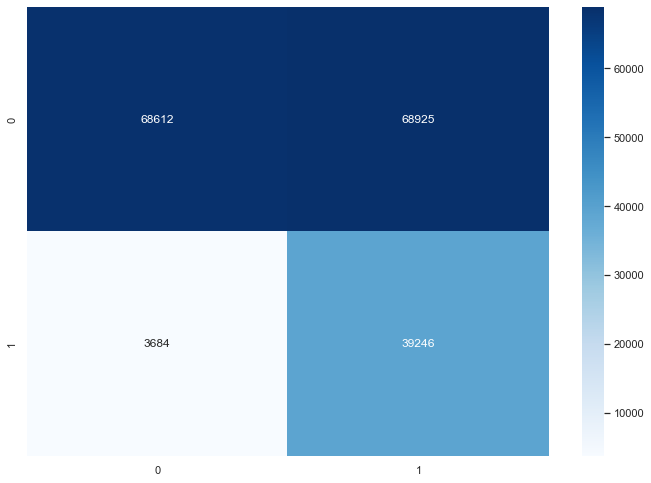

In [84]:
f = sns.heatmap(cm_gnb, annot=True, fmt='d', cmap = 'Blues' ) 
plt.show()

#### ROC Curve 

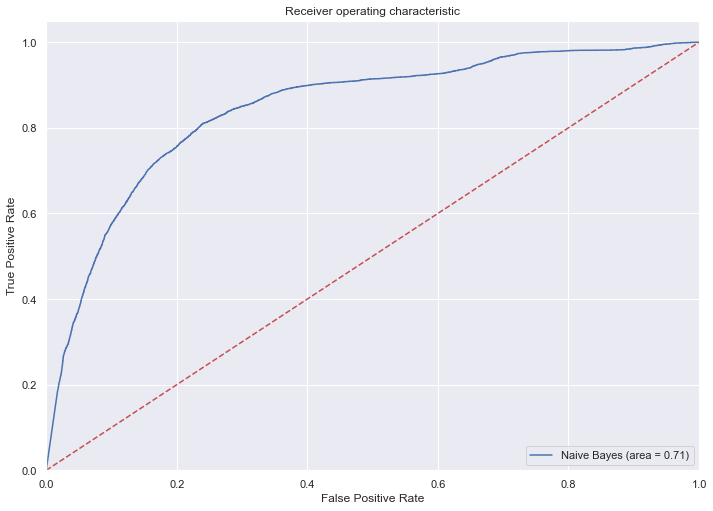

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

# Q11: Logit Model

#### Q11.1 Build a model to predict income > $50K using logistic regression. Randomly partition the data into a training set (70%) and a validation set (30%).

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(X_train,y_train)
LR

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
#Using our model to predict our test values
ypred_lr = LR.predict(X_test)
ypred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred_lr)

0.13523846682623442

#### Q11.2 For which variables can we reject the null hypothesis that their coefficients equal zero?

Age, Hours_per_Week, Net_Capital are the prime useful variables, 
all others have p value > 0.05 and show no significance in relationship with our dependent/y variable

In [89]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.335102
         Iterations: 35


/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.390      
Dependent Variable:          Income                    AIC:                       282298.1276
Date:                        2021-11-10 19:25          BIC:                       282758.0526
No. Observations:            421087                    Log-Likelihood:            -1.4111e+05
Df Model:                    41                        LL-Null:                   -2.3145e+05
Df Residuals:                421045                    LLR p-value:               0.0000     
Converged:                   0.0000                    Scale:                     1.0000     
No. Iterations:              35.0000                                                         
---------------------------------------------------------------------------------------------
                                 Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
------

#### Q11.3 Score the validation data (predict) using the model. Produce a confusion table and an ROC curve for the scored validation data.

Classification Report Using Logistic Regression 

               precision    recall  f1-score   support

           0       0.88      0.93      0.90    137537
           1       0.71      0.58      0.64     42930

    accuracy                           0.84    180467
   macro avg       0.79      0.75      0.77    180467
weighted avg       0.84      0.84      0.84    180467

Confusion Matrix Using Logistic Regression 
 [[127237  10300]
 [ 17993  24937]]


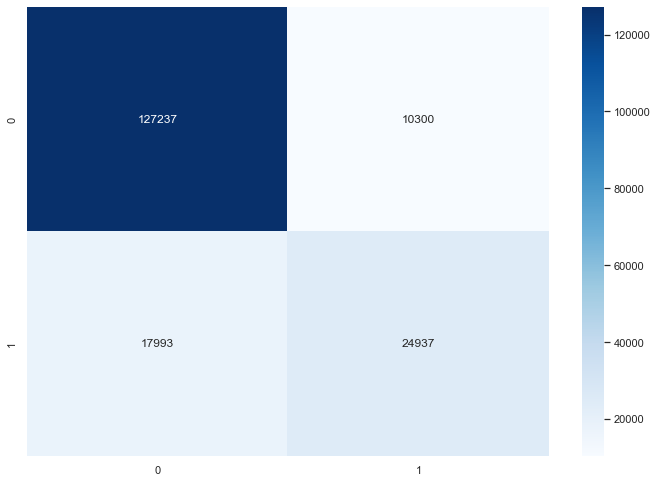

In [90]:
#validation scores and accuracy results all 
print("Classification Report Using Logistic Regression \n\n",classification_report(y_test, ypred_lr))
#confusion matrix
cm_lr = confusion_matrix(y_test, ypred_lr)
print("Confusion Matrix Using Logistic Regression \n", cm_lr)
f = sns.heatmap(cm_lr, annot=True, fmt='d', cmap = 'Blues' ) 

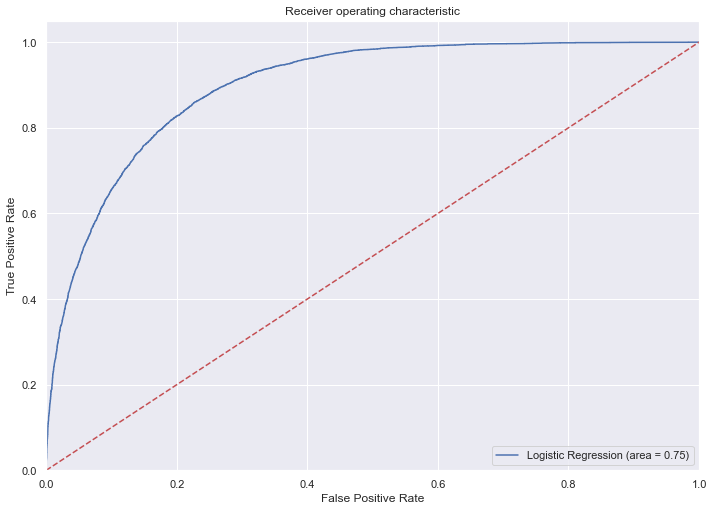

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Q11.4 From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.

Already done above 

### Q12: Tree Model (CART)

#### Q12.1 Build a model to predict income > $50K using a classification tree and a random forest with the same training and validation data used for the naïve Bayes and logistic regression models.

In [92]:
from sklearn.tree import DecisionTreeClassifier


d_tree = DecisionTreeClassifier(random_state=0, max_depth=2).fit(X_train,y_train)
ypred_dt = d_tree.predict(X_test)
ypred_dt

array([0, 0, 0, ..., 0, 0, 0])

#### Q12.2 Which variables are useful for decision rules?

In [93]:
from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz
import graphviz
feat_importance = d_tree.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))
out = StringIO()
out=export_graphviz(d_tree)


feat importance = [0.         0.         0.02165448 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.07408176 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


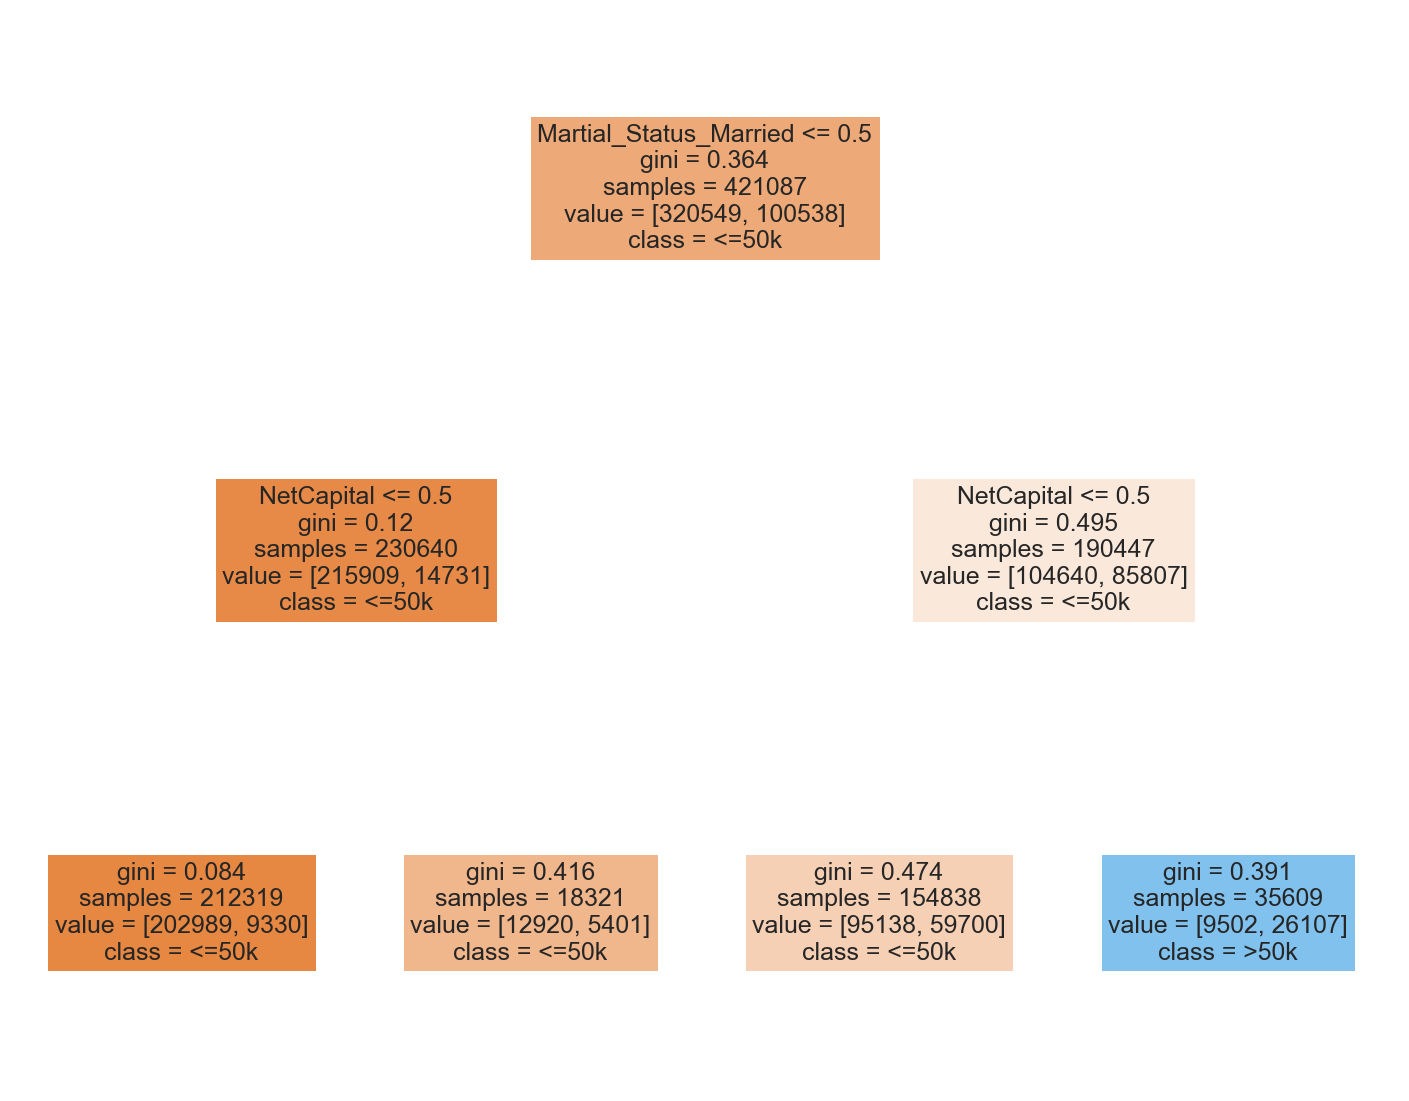

In [94]:

fig = plt.figure(figsize=(25,20))
tree.plot_tree(d_tree,
               feature_names = x_names, 
               class_names = ["<=50k",">50k"],
               filled = True);
fig.savefig('imagename.png')

#### Q12.4 Score the validation data (predict) using the model. Produce a confusion table and an ROC curve for the scored validation data.


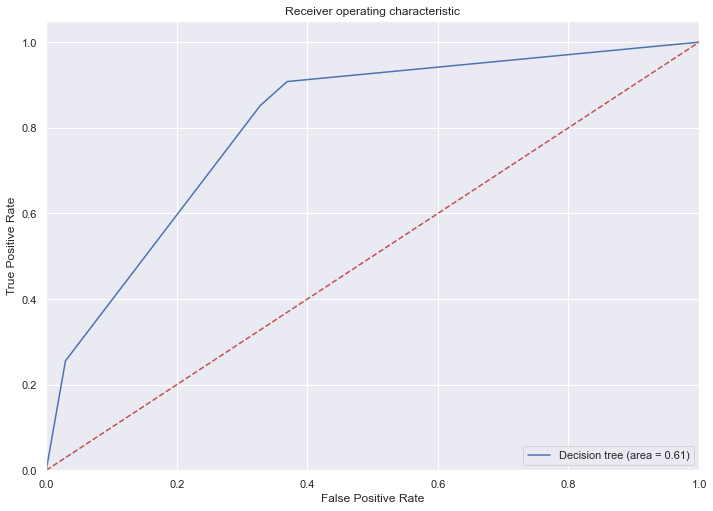

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, d_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, d_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DTREE_ROC')
plt.show()

#### Q12.5 From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.

Classification Report Using Logistic Regression 

               precision    recall  f1-score   support

           0       0.81      0.97      0.88    137537
           1       0.73      0.26      0.38     42930

    accuracy                           0.80    180467
   macro avg       0.77      0.61      0.63    180467
weighted avg       0.79      0.80      0.76    180467

Confusion Matrix Using Logistic Regression 
 [[133476   4061]
 [ 31954  10976]]


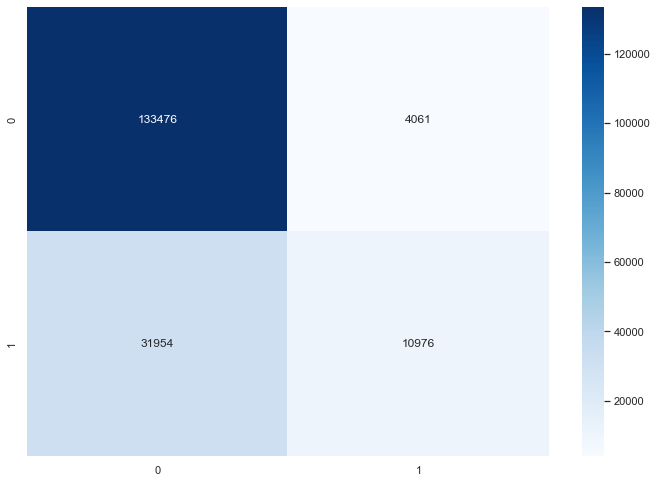

In [96]:
#validation scores and accuracy results all 
print("Classification Report Using Logistic Regression \n\n",classification_report(y_test, ypred_dt))
#confusion matrix
cm_dt = confusion_matrix(y_test, ypred_dt)
print("Confusion Matrix Using Logistic Regression \n", cm_dt)
f = sns.heatmap(cm_dt, annot=True, fmt='d', cmap = 'Blues' ) 

#### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
ypred_rf

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 0, 0, ..., 0, 0, 0])

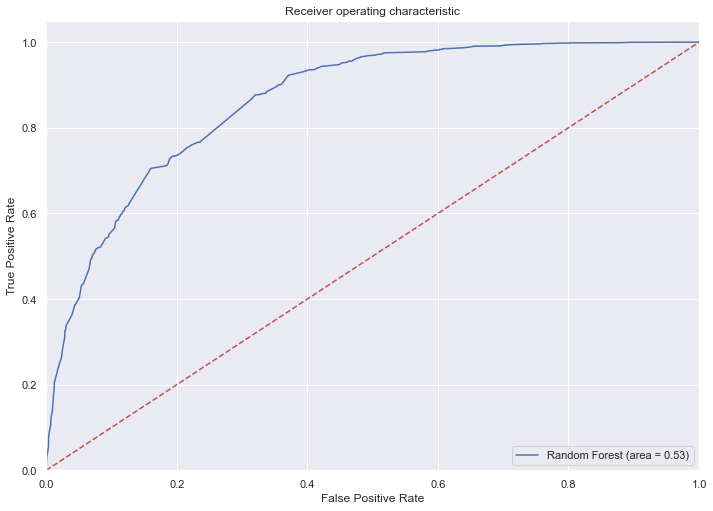

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

Classification Report Using Random Forest 

               precision    recall  f1-score   support

           0       0.77      1.00      0.87    137537
           1       0.83      0.05      0.10     42930

    accuracy                           0.77    180467
   macro avg       0.80      0.53      0.49    180467
weighted avg       0.79      0.77      0.69    180467

Confusion Matrix Using Logistic Regression 
 [[137069    468]
 [ 40575   2355]]


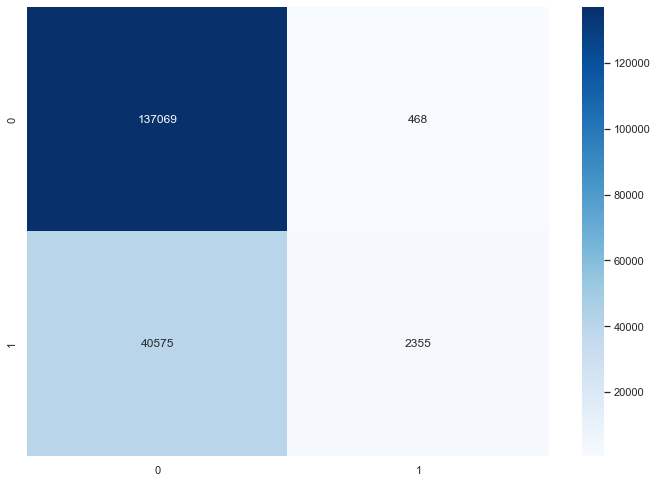

In [99]:
#validation scores and accuracy results all 
print("Classification Report Using Random Forest \n\n",classification_report(y_test, ypred_rf))
#confusion matrix
cm_rf = confusion_matrix(y_test, ypred_rf)
print("Confusion Matrix Using Logistic Regression \n", cm_rf)
f = sns.heatmap(cm_rf, annot=True, fmt='d', cmap = 'Blues' ) 

#### Model Comparison

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when 

LR: 0.841940 (0.001367)
CART: 0.965606 (0.000688)


/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_s

RForest: 0.965437 (0.000734)


/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when 

NB: 0.594768 (0.003185)


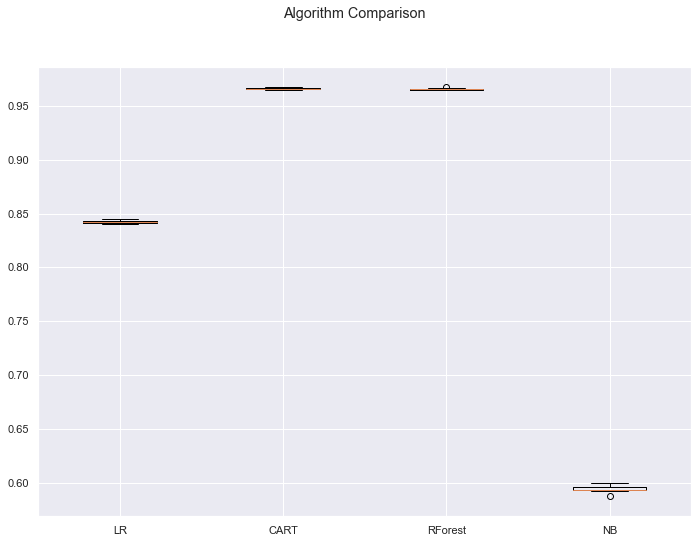

In [100]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RForest', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #try passing whole data instead of X and y for testing
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### The best model for same sample data (X_train and Y_train)

$Logistic Regression: 84.4 $ %(0.001112)<br>
$CART: 96.56% $%(0.000833)<br>
$Random Forest: 96.56 $% (0.000876)<br>
$Naive Bayes: 68.13 $%(0.002680)<br>

Dont take this one for model results comparison, the overall data shown below is the one to look for.

Also, check box plot for better understanding.

### Best Model for overall Data

Try Rerun of comparison with whole data (X,y) instead of X_train, y_train, results could be different
for whole datasets, LR wins with Rf second and CART/DTree 3rd.<br>
LR: 0.842639 (0.005621)<br>
CART: 0.797885 (0.005588)<br>
RForest: 0.818764 (0.005474)<br>
NB: 0.674619 (0.006823)
    

### Ideal Customer Calculations

In [102]:
data_with_pred = X_test.copy()

In [103]:
data_with_pred['Actual_Y'] = y_test
data_with_pred['Predicted'] = ypred_lr
data_with_pred.head()

,Age,Hours_per_Week,NetCapital,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,...,Native_Country_Others,Education_group_ High-Secondary,Education_group_Bachelors,Education_group_Doctorate,Education_group_High-Secondary,Education_group_Masters,Education_group_Primary,Education_group_Secondary,Actual_Y,Predicted
21011,21,40.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11759,56,40.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14710,23,40.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1950,44,40.0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2825,38,55.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [104]:
mismatched = data_with_pred[(data_with_pred.Actual_Y - data_with_pred.Predicted) != 0]
mismatched.head()

,Age,Hours_per_Week,NetCapital,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,...,Native_Country_Others,Education_group_ High-Secondary,Education_group_Bachelors,Education_group_Doctorate,Education_group_High-Secondary,Education_group_Masters,Education_group_Primary,Education_group_Secondary,Actual_Y,Predicted
1950,44,40.0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2825,38,55.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7214,39,40.0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
18279,72,50.0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9396,54,55.0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [117]:
from math import exp
def log_equation(z, beta):
    result = 1 /(1+exp(-z * beta))
    return result

In [118]:
#coeff of best model
coeff = LR.coef_
intercept = LR.intercept_
X_col = X.columns.to_list()

In [119]:
coeff_df = pd.DataFrame(coeff, columns =X_col)
coeff_df

,Age,Hours_per_Week,NetCapital,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,...,Native_Country_ United-States,Native_Country_ Unknown,Native_Country_Others,Education_group_ High-Secondary,Education_group_Bachelors,Education_group_Doctorate,Education_group_High-Secondary,Education_group_Masters,Education_group_Primary,Education_group_Secondary
0,0.026418,0.038852,1.496538,0.439672,-0.219566,-0.206547,-0.03095,0.311279,-0.367924,-0.382142,...,-0.258612,-0.678669,-0.486337,-0.167405,0.319064,1.2919,-0.515562,0.595034,-2.148122,-1.79989


In [120]:
LR.predict(coeff_df)

array([1])

### Top Variables for us are:

   #### Net_Capital (1.4974) 
   #### Hours_per_Week (0.0389) 
   #### Age (0.0265)

In [121]:
Net_Capital = coeff_df.NetCapital.values[0]
Hours_per_Week = coeff_df.Hours_per_Week.values[0]
Age = coeff_df.Age

Net_Capital, Hours_per_Week, Age

(1.496537992290086, 0.038852224532057236, 0    0.026418
 Name: Age, dtype: float64)

In [123]:
beta_NC = coeff_df.NetCapital
beta_Hrs = coeff_df.Hours_per_Week
beta_Age = coeff_df.Age

In [126]:
print("Log odds for Net_Capital: ", log_equation(Net_Capital, beta_NC))
print("Log odds for Hours_per_Week: ", log_equation(Hours_per_Week, beta_Hrs))
print("Log odds for Age: ", log_equation(Age, beta_Age))

Log odds for Net_Capital:  0.9037519277705393
Log odds for Hours_per_Week:  0.5003773737661161
Log odds for Age:  0.5001744715018112



For each one unit Increas in Net Capital (Capital_Gain), there is 90.37% increase in the odds that the income of that person is greater than 50k. <br>

For each one hour increase in Hours_per_week work someone does, there is 50.03% increase in the odds that the income of that person is greater than 50k.<br>

For each one year increase in Age, there is 50% increase in the odds that the income of that person is greater than 50k.